In [48]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.signal as sig
%matplotlib inline

from scipy.fftpack import fft, ifft

In [109]:
#signal,noise,signal+noiseを生成
n=1000
x=np.linspace(-10*np.pi,10*np.pi,n)
signal=np.sin(x*10)+np.sin(x*0.1)
noise=np.sin(x*4)+np.sin(x*3.5)+np.sin(x*3)+np.random.randn(n)*0.05
sn=noise+signal

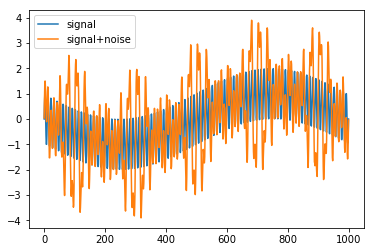

In [110]:
plt.plot(signal,label='signal')
plt.plot(sn,label='signal+noise')
plt.legend()

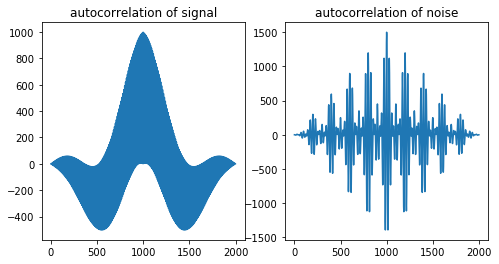

In [111]:
sc=np.correlate(signal,signal,"full")
nc=np.correlate(noise,noise,"full")
plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
plt.plot(sc)
plt.title('autocorrelation of signal')
plt.subplot(1,2,2)
plt.plot(nc)
plt.title('autocorrelation of noise')

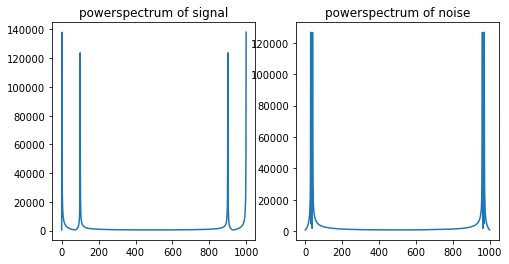

In [112]:
sfpc=fft(sc,n=n)
nfpc=fft(nc,n=n)
plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
plt.plot(np.abs(sfpc))
plt.title('powerspectrum of signal')
plt.subplot(1,2,2)
plt.plot(np.abs(nfpc))
plt.title('powerspectrum of noise')

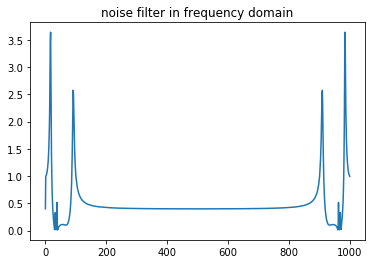

In [122]:
#フィルターのフーリエ変換を求める
noise_filter=sfpc/(sfpc+nfpc)
plt.plot(np.abs(noise_filter))
plt.title('noise filter in frequency domain')

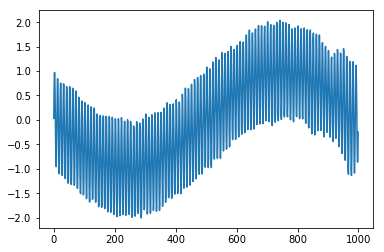

In [114]:
#フィルターを適用
sn_nf=ifft(fft(sn)*df)
plt.plot(sn_nf.real)

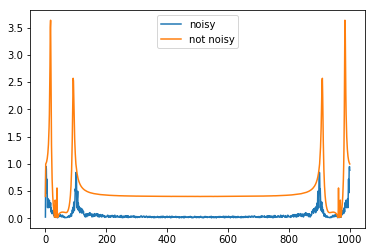

In [115]:
#noise大
noisy_noise=np.sin(x*4)+np.sin(x*3.5)+np.sin(x*3)+np.random.randn(n)*5
nc=np.correlate(noisy_noise,noisy_noise,"full")
nfpc_noisy=fft(nc,n=n)
df_noisy=sfpc/(sfpc+nfpc_noisy)
plt.plot(np.abs(df_noisy),label='noisy')
plt.plot(np.abs(df),label='not noisy')
plt.legend()

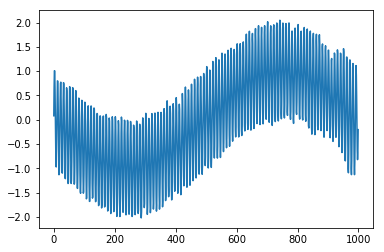

In [116]:
#上では真のシグナルと観測されたシグナルに乗っていたノイズを知っていることになっていたが、ここでは知らない
noise_observed=np.sin(x*4)+np.sin(x*3.5)+np.sin(x*3)+np.random.randn(n)*0.05
nc=np.correlate(noise_observed,noise_observed,"full")
nfc=np.fft.fft(nc,n=n)

snc=np.correlate(sn,sn,"full")
snfc=fft(snc,n=n)
sfc_approx=snfc-nfc

noise_filter_approx=sfc_approx/(sfc_approx+nfc)
sn_nf_approx=ifft(fft(sn)*noise_filter_approx)

plt.plot(sn_nf_approx.real)

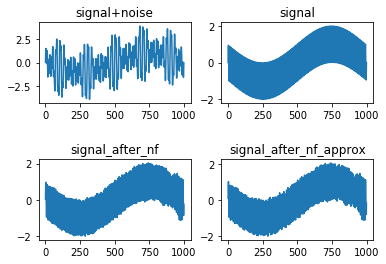

In [121]:
plt.subplot(2,2,1)
plt.plot(sn)
plt.title('signal+noise')

plt.subplot(2,2,2)
plt.plot(signal)
plt.title('signal')

plt.subplot(2,2,3)
plt.plot(sn_nf.real)
plt.title('signal_after_nf')

plt.subplot(2,2,4)
plt.plot(sn_nf_approx.real)
plt.title('signal_after_nf_approx')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.7)
